🚀 Running Full PaddleOCR on: Rumsey_Map_OCR_Data/rumsey/icdar24-val-png/val_images\8819000_h2_w6.png

--- 📝 Found 18 Text Regions ---
Text: Bombay               (Conf: 1.00)
Text: -344.                (Conf: 0.83)
Text: INDIA                (Conf: 0.99)
Text: 11352                (Conf: 0.99)
Text: BAY                  (Conf: 1.00)
Text: 11201                (Conf: 0.98)
Text: ANG                  (Conf: 0.97)
Text: Kozhikode            (Conf: 1.00)
Text: LACCADIVE            (Conf: 1.00)
Text: ISLANDS              (Conf: 1.00)
Text: CEYLON               (Conf: 1.00)
Text: 8281                 (Conf: 0.99)
Text: Colomboc             (Conf: 0.90)
Text: 134190               (Conf: 0.90)
Text: -13602               (Conf: 0.96)
Text: MALDIVE              (Conf: 0.98)
Text: ISLANDS              (Conf: 1.00)
Text: 13602                (Conf: 0.99)

🎉 Benchmark Saved: benchmark_paddle_output.png


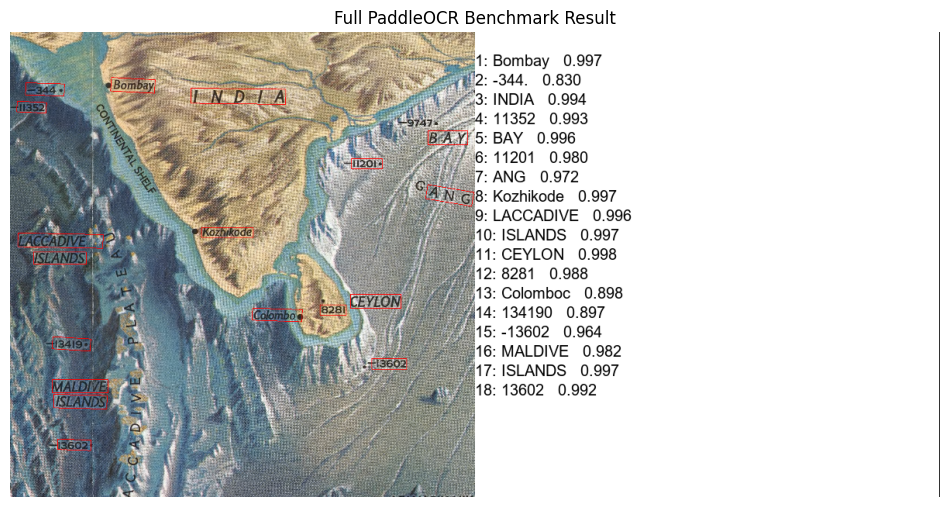

In [7]:
from paddleocr import PaddleOCR, draw_ocr
import cv2
import matplotlib.pyplot as plt
from PIL import Image

# --- 1. SETUP ---
# We use the CPU mode which we know is stable on your machine
ocr = PaddleOCR(use_angle_cls=True, lang='en', use_gpu=False, show_log=False)

# Image Path (using the same one from before)
img_path = TEST_IMAGE_PATH 
print(f"🚀 Running Full PaddleOCR on: {img_path}")

# --- 2. RUN FULL PIPELINE (Detection + Recognition) ---
# This uses Paddle's pre-trained detector (DBNet) instead of our U-Net
result = ocr.ocr(img_path, cls=True)

# --- 3. VISUALIZE RESULTS ---
image = Image.open(img_path).convert('RGB')
boxes = [line[0] for line in result[0]]
txts = [line[1][0] for line in result[0]]
scores = [line[1][1] for line in result[0]]

# Draw results
im_show = draw_ocr(image, boxes, txts, scores, font_path='arial.ttf') # Arial is standard on Windows
im_show = Image.fromarray(im_show)

# Print what it found
print(f"\n--- 📝 Found {len(txts)} Text Regions ---")
for text, score in zip(txts, scores):
    print(f"Text: {text:<20} (Conf: {score:.2f})")

# Save and Display
OUTPUT_BENCHMARK = "benchmark_paddle_output.png"
im_show.save(OUTPUT_BENCHMARK)
print(f"\n🎉 Benchmark Saved: {OUTPUT_BENCHMARK}")

plt.figure(figsize=(12, 12))
plt.imshow(im_show)
plt.axis('off')
plt.title("Full PaddleOCR Benchmark Result")
plt.show()

In [8]:
import os
import csv
from paddleocr import PaddleOCR
from PIL import Image

# --- 1. CONFIGURATION ---
# Use the known working path to the validation images
VAL_ROOT = "Rumsey_Map_OCR_Data/rumsey/icdar24-val-png/val_images"
OUTPUT_CSV_FILE = "map_ocr_results.csv"

# --- 2. INITIALIZE PADDLEOCR (The Winning Model) ---
print("Initializing Full PaddleOCR Pipeline (CPU Mode)...")
# Using the stable v2.7 CPU configuration established during debugging
ocr_reader = PaddleOCR(use_angle_cls=True, lang="en", use_gpu=False, show_log=False) 

# --- 3. BATCH PROCESSING ---
results_data = []
header = ['image_file', 'text_id', 'text', 'confidence', 'bbox_coords']
results_data.append(header)

# Loop through all image files in the validation directory
image_files = [f for f in os.listdir(VAL_ROOT) if f.endswith('.png')]
print(f"--- Found {len(image_files)} images to process. Starting batch job. ---")

for filename in image_files:
    img_path = os.path.join(VAL_ROOT, filename)
    
    # Run OCR on the full image (Detection + Recognition)
    # The image path is provided directly to the ocr method
    result = ocr_reader.ocr(img_path, cls=True)
    
    # Check for results and process structure [ [ [bbox], [text, conf] ], ...]
    if result and result[0]:
        print(f"  ✅ Processing: {filename} - Found {len(result[0])} items.")
        
        for text_id, line in enumerate(result[0]):
            bbox = line[0]
            text, conf = line[1]
            
            # Append structured data
            results_data.append([
                filename,
                text_id + 1,
                text,
                f"{conf:.4f}",
                str(bbox) # Save bounding box coordinates as a string
            ])
    else:
        print(f"  ❌ Processing: {filename} - No text found.")

# --- 4. SAVE TO CSV ---
try:
    with open(OUTPUT_CSV_FILE, 'w', newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerows(results_data)
        
    print(f"\n🎉 Batch Processing Complete!")
    print(f"All {len(image_files)} maps processed. Results saved to: {OUTPUT_CSV_FILE}")
    
except Exception as e:
    print(f"🛑 Error saving CSV: {e}")

Initializing Full PaddleOCR Pipeline (CPU Mode)...
--- Found 40 images to process. Starting batch job. ---
  ✅ Processing: 8819000_h2_w6.png - Found 18 items.
  ✅ Processing: 8826002_h4_w5.png - Found 36 items.
  ✅ Processing: 8831000_h3_w4.png - Found 113 items.
  ✅ Processing: 8880003_h5_w5.png - Found 8 items.
  ✅ Processing: 8883002_h11_w14.png - Found 153 items.
  ✅ Processing: 8915000_h2_w3.png - Found 28 items.
  ✅ Processing: 8926002_h3_w2.png - Found 12 items.
  ✅ Processing: 9016003_h4_w4.png - Found 20 items.
  ✅ Processing: 9016007_h13_w9.png - Found 15 items.
  ✅ Processing: 9034002_h10_w16.png - Found 166 items.
  ✅ Processing: 9035000_h5_w12.png - Found 103 items.
  ✅ Processing: 9053003_h6_w6.png - Found 11 items.
  ✅ Processing: 9094002_h5_w10.png - Found 85 items.
  ✅ Processing: 9096002_h4_w8.png - Found 91 items.
  ✅ Processing: 9103002_h2_w6.png - Found 91 items.
  ✅ Processing: 9105002_h2_w6.png - Found 131 items.
  ✅ Processing: 9156000_h13_w4.png - Found 56 item

In [10]:
import pandas as pd

# --- 1. CONFIGURATION ---
SOURCE_CSV_FILE = "map_ocr_results.csv"
CLEANED_CSV_FILE = "map_ocr_results_CLEANED.csv"
CONFIDENCE_THRESHOLD = 0.80

# --- 2. LOAD DATA (FIX for NameError) ---
try:
    # This line re-creates the missing 'df' variable
    df = pd.read_csv(SOURCE_CSV_FILE)
    print(f"✅ Successfully loaded {len(df)} initial readings from {SOURCE_CSV_FILE}.")
except FileNotFoundError:
    print(f"🛑 Error: {SOURCE_CSV_FILE} not found. Please ensure it is in the current directory.")
    exit()

# --- 3. FILTER DATA (Optimal Step) ---
print(f"Applying optimal filter: Retaining only readings with confidence >= {CONFIDENCE_THRESHOLD}")

# Filter the DataFrame to keep only high-confidence readings
df_cleaned = df[df['confidence'] >= CONFIDENCE_THRESHOLD].copy()

# --- 4. REPORT & SAVE ---
total_initial = len(df)
total_cleaned = len(df_cleaned)

print("\n--- Filtering Results ---")
print(f"Total initial readings: {total_initial}")
print(f"Total readings retained: {total_cleaned}")
print(f"Percentage of readings retained: {(total_cleaned / total_initial) * 100:.2f}%")
print(f"New Mean Confidence (Quality Score): {df_cleaned['confidence'].mean():.4f}")

# Save the cleaned, high-quality dataset
df_cleaned.to_csv(CLEANED_CSV_FILE, index=False)
print(f"\n🎉 Successfully saved final, high-quality dataset to: {CLEANED_CSV_FILE}")

✅ Successfully loaded 2767 initial readings from map_ocr_results.csv.
Applying optimal filter: Retaining only readings with confidence >= 0.8

--- Filtering Results ---
Total initial readings: 2767
Total readings retained: 2382
Percentage of readings retained: 86.09%
New Mean Confidence (Quality Score): 0.9616

🎉 Successfully saved final, high-quality dataset to: map_ocr_results_CLEANED.csv


In [1]:
import pandas as pd
import re
import ast

def parse_bbox(bbox_str):
    """Parses the string representation of the bounding box list."""
    try:
        return ast.literal_eval(bbox_str)
    except:
        return []

def get_tile_coords(filename):
    """Extracts (h, w) coordinates from filename like '9096002_h4_w8.png'."""
    match = re.search(r'_h(\d+)_w(\d+)', filename)
    if match:
        return int(match.group(1)), int(match.group(2))
    return None, None

def get_base_name(filename):
    """Extracts the base map ID like '9096002'."""
    return filename.split('_h')[0]

def stitch_csv(input_csv, output_csv, tile_size=2000, edge_tolerance=10, vertical_tolerance=20):
    print(f"🔄 Loading {input_csv}...")
    df = pd.read_csv(input_csv)
    
    # 1. Parse Metadata
    df['bbox'] = df['bbox_coords'].apply(parse_bbox)
    df['base_map'] = df['image_file'].apply(get_base_name)
    coords = df['image_file'].apply(get_tile_coords)
    df['tile_h'] = [c[0] for c in coords]
    df['tile_w'] = [c[1] for c in coords]
    
    # Calculate absolute coordinates (stitch the map back together virtually)
    # We assume bbox is [[x1,y1], [x2,y2], [x3,y3], [x4,y4]]
    # Absolute X = x + (tile_w * tile_size)
    # Absolute Y = y + (tile_h * tile_size)
    
    absolute_rows = []
    
    print("🧩 Stitching tiles and merging split text...")
    
    # Group by the Map ID so we don't mix different maps
    for map_id, group in df.groupby('base_map'):
        # Sort by horizontal position then vertical
        group = group.sort_values(['tile_w', 'tile_h'])
        
        # We need a list to manage merges. 
        # We will iterate and verify if a text is "mergeable" with the previous one.
        
        # Convert to a list of dicts for easier manipulation
        records = group.to_dict('records')
        merged_records = []
        
        skip_indices = set()
        
        for i in range(len(records)):
            if i in skip_indices:
                continue
                
            current = records[i]
            
            # Get current box edges
            curr_box = current['bbox']
            if not curr_box: continue
            
            # Simple box: [min_x, min_y, max_x, max_y] roughly
            c_xs = [p[0] for p in curr_box]
            c_ys = [p[1] for p in curr_box]
            c_min_x, c_max_x = min(c_xs), max(c_xs)
            c_min_y, c_max_y = min(c_ys), max(c_ys)
            
            merged = False
            
            # Check against subsequent records for a match
            for j in range(i + 1, len(records)):
                if j in skip_indices: continue
                
                candidate = records[j]
                
                # OPTIMIZATION: Only check neighbors (same H, adjacent W)
                if candidate['tile_h'] != current['tile_h']:
                    continue
                if candidate['tile_w'] != current['tile_w'] + 1:
                    continue
                
                # Check candidate edges
                cand_box = candidate['bbox']
                if not cand_box: continue
                
                d_xs = [p[0] for p in cand_box]
                d_ys = [p[1] for p in cand_box]
                d_min_x = min(d_xs)
                d_min_y, d_max_y = min(d_ys), max(d_ys)
                
                # LOGIC:
                # 1. Current text ends near right edge (tile_size)
                # 2. Candidate text starts near left edge (0)
                # 3. Vertical alignment (y coordinates overlap)
                
                at_right_edge = abs(c_max_x - tile_size) < edge_tolerance
                at_left_edge = abs(d_min_x - 0) < edge_tolerance
                vertical_align = abs(c_min_y - d_min_y) < vertical_tolerance
                
                if at_right_edge and at_left_edge and vertical_align:
                    # MERGE FOUND!
                    new_text = str(current['text']) + str(candidate['text'])
                    # Simple heuristic: remove trailing hyphen if present in first word
                    if current['text'].endswith('-'):
                        new_text = current['text'][:-1] + candidate['text']
                        
                    # Update current record
                    current['text'] = new_text
                    # We keep the bbox of the left part for now, or you could merge bbox
                    # Mark candidate as processed
                    skip_indices.add(j)
                    merged = True
                    break # Stop looking for this item
            
            merged_records.append(current)

        absolute_rows.extend(merged_records)

    # Convert back to DataFrame
    final_df = pd.DataFrame(absolute_rows)
    
    # --- NOISE FILTERING ---
    print("🧹 Cleaning noise (short numbers, symbols)...")
    
    # 1. Remove very short numeric-only strings (likely depth markers like "15", "4")
    # Keep if length > 3 (like dates 1988) or alpha characters present
    def is_noise(text):
        text = str(text)
        if len(text) < 2: return True # Single chars
        if text.isdigit() and len(text) < 4: return True # "34", "150"
        if re.match(r"^\d+'\d+$", text): return True # "4'4" depth markers
        return False

    final_df = final_df[~final_df['text'].apply(is_noise)]

    # Select columns to save
    cols = ['image_file', 'text_id', 'text', 'confidence', 'bbox_coords']
    final_df[cols].to_csv(output_csv, index=False)
    print(f"✅ Done! Saved stitched results to {output_csv}")

# --- RUN IT ---
# Ensure your CSV filename matches
stitch_csv('map_ocr_results_CLEANED.csv', 'map_ocr_results_STITCHED.csv')

🔄 Loading map_ocr_results_CLEANED.csv...
🧩 Stitching tiles and merging split text...
🧹 Cleaning noise (short numbers, symbols)...
✅ Done! Saved stitched results to map_ocr_results_STITCHED.csv


In [3]:
import pandas as pd
import re
import os

# --- CONFIGURATION ---
INPUT_CSV = 'map_ocr_results_CLEANED.csv'
OUTPUT_CSV = 'map_ocr_results_STRICT_CLEAN.csv'

def is_valid_text(text, conf):
    text = str(text).strip()
    
    # 1. REMOVE NOISE (Short, low confidence)
    # If text is 1 character (e.g., "S", "E"), it must be VERY confident (Directions)
    if len(text) < 2:
        return conf > 0.98

    # 2. REMOVE DEPTH MARKERS (Numbers)
    # Remove if it's purely digits and less than 4 chars (e.g., "17", "344")
    if text.isdigit() and len(text) < 4:
        return False
        
    # 3. REMOVE GIBBERISH (Non-Alphanumeric start/end)
    if not text[0].isalnum():
        return False
        
    return True

def clean_dataset():
    if not os.path.exists(INPUT_CSV):
        print(f"❌ Error: Input file '{INPUT_CSV}' not found. Check your path.")
        return

    print(f"📖 Reading {INPUT_CSV}...")
    df = pd.read_csv(INPUT_CSV)
    original_count = len(df)

    # Filter
    df = df[df['confidence'] > 0.85]
    mask = df.apply(lambda x: is_valid_text(x['text'], x['confidence']), axis=1)
    clean_df = df[mask]

    removed_count = original_count - len(clean_df)
    
    # Save
    clean_df.to_csv(OUTPUT_CSV, index=False)
    
    print("-" * 30)
    print(f"❌ Removed: {removed_count} rows (Noise/Errors)")
    print(f"✅ Remaining: {len(clean_df)} clean rows")
    print(f"💾 Saved to: {OUTPUT_CSV}")
    print("-" * 30)

if __name__ == "__main__":
    clean_dataset()

📖 Reading map_ocr_results_CLEANED.csv...
------------------------------
❌ Removed: 369 rows (Noise/Errors)
✅ Remaining: 2013 clean rows
💾 Saved to: map_ocr_results_STRICT_CLEAN.csv
------------------------------
